In [1]:
# Imports
# pandas

import pandas as pd
from pandas import Series, DataFrame

# # numpy, matplotlib,seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# # machine learning
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

/Users/aishwaryachinnari/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:

import patsy

In [3]:
tita_df = pd.read_csv("/Users/aishwaryachinnari/Desktop/myproj/D/Capstone_Titanic/Titanic/genderclassmodel.csv")
tita_df.head(4)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0


In [4]:
tita_df_1 = pd.read_csv("/Users/aishwaryachinnari/Desktop/myproj/D/Capstone_Titanic/Titanic/train-3.csv")
tita_df_1.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [5]:
tita_df_1.shape

(891, 12)

In [6]:
## Looking for missing values on my dataset
tita_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
tita_df_1.Cabin.describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

In [8]:
tita_df_1.Cabin.isnull().sum()

687

In [9]:
### Missing values calculations
tita_df_1.Sex.isnull().sum()

0

In [10]:
tita_df_1.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [11]:
tita_df_1.Embarked.isnull().sum()

2

In [12]:
tita_df_1.Fare.isnull().sum()

0

In [13]:
tita_df_1.groupby(['Sex','Embarked'])[['Survived']].count()

Survived
Sex    Embarked          
female C               73
       Q               36
       S              203
male   C               95
       Q               41
       S              441

In [14]:
# tita_df_1.groupby?

In [15]:
tita_df_1.groupby(['Sex','Embarked'])[['Survived']].mean()

Survived
Sex    Embarked          
female C         0.876712
       Q         0.750000
       S         0.689655
male   C         0.305263
       Q         0.073171
       S         0.174603

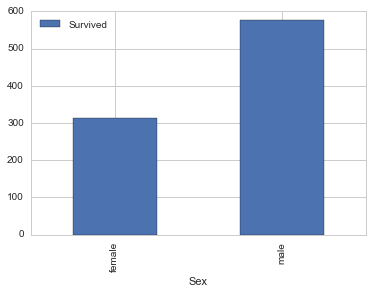

In [16]:
tita_df_1.groupby(['Sex'])[['Survived']].count().plot(kind='bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118020550>]], dtype=object)

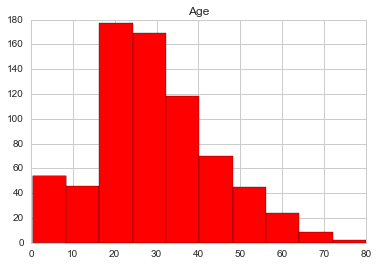

In [17]:
tita_df_1.hist(column="Age", color='r')

In [18]:
tita_df_1.Embarked.isnull().sum()

2

In [19]:
tita_df_1['Embarked'].head(3)


0    S
1    C
2    S
Name: Embarked, dtype: object

In [20]:
tita_df_1.Embarked.isnull().sum()

2

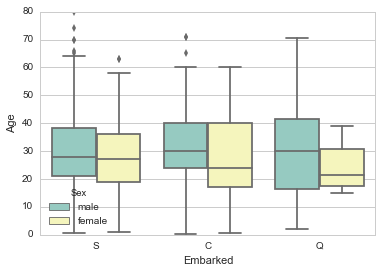

In [21]:
sns.boxplot(x="Embarked", y="Age", hue="Sex", data=tita_df_1, palette="Set3")

In [22]:
tita_df_1.groupby(['Cabin'])[['Survived']].count()
for df in tita_df_1['Cabin']:
    print df

nan
C85
nan
C123
nan
nan
E46
nan
nan
nan
G6
C103
nan
nan
nan
nan
nan
nan
nan
nan
nan
D56
nan
A6
nan
nan
nan
C23 C25 C27
nan
nan
nan
B78
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
D33
nan
B30
C52
nan
nan
nan
nan
nan
B28
C83
nan
nan
nan
F33
nan
nan
nan
nan
nan
nan
nan
nan
F G73
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
C23 C25 C27
nan
nan
nan
E31
nan
nan
nan
A5
D10 D12
nan
nan
nan
nan
D26
nan
nan
nan
nan
nan
nan
nan
C110
nan
nan
nan
nan
nan
nan
nan
B58 B60
nan
nan
nan
nan
E101
D26
nan
nan
nan
F E69
nan
nan
nan
nan
nan
nan
nan
D47
C123
nan
B86
nan
nan
nan
nan
nan
nan
nan
nan
F2
nan
nan
C2
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
E33
nan
nan
nan
B19
nan
nan
nan
A7
nan
nan
C49
nan
nan
nan
nan
nan
F4
nan
A32
nan
nan
nan
nan
nan
nan
nan
F2
B4
B80
nan
nan
nan
nan
nan
nan
nan
nan
nan
G6
nan
nan
nan
A31
nan
nan
nan
nan
nan
D36
nan
nan
D15
nan
nan
nan
nan
nan
C93
nan
nan
nan
nan
nan
C83
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
n

In [23]:
clean = tita_df_1['Cabin'].dropna()
clean


1              C85
3             C123
6              E46
10              G6
11            C103
21             D56
23              A6
27     C23 C25 C27
31             B78
52             D33
54             B30
55             C52
61             B28
62             C83
66             F33
75           F G73
88     C23 C25 C27
92             E31
96              A5
97         D10 D12
102            D26
110           C110
118        B58 B60
123           E101
124            D26
128          F E69
136            D47
137           C123
139            B86
148             F2
          ...     
751           E121
759            B77
763        B96 B98
765            D11
772            E77
776            F38
779             B3
781            B20
782             D6
789        B82 B84
796            D17
802        B96 B98
806            A36
809             E8
815           B102
820            B69
823           E121
829            B28
835            E49
839            C47
849            C92
853         

In [24]:
clean = tita_df_1['Cabin'].dropna()
clean

for data in clean:
    a= data.split(' ')
    print (a[0])

C85
C123
E46
G6
C103
D56
A6
C23
B78
D33
B30
C52
B28
C83
F33
F
C23
E31
A5
D10
D26
C110
B58
E101
D26
F
D47
C123
B86
F2
C2
E33
B19
A7
C49
F4
A32
F2
B4
B80
G6
A31
D36
D15
C93
C83
C78
D35
G6
C87
B77
E67
B94
C125
C99
C118
D7
A19
B49
D
C22
C106
B58
E101
C22
C65
E36
C54
B57
C7
E34
C32
D
B18
C124
C91
C2
E40
T
F2
C23
F33
C128
E33
D37
B35
E50
C82
B96
D36
G6
C78
E10
C52
E44
B96
C23
A34
C104
C111
C92
E38
D21
E12
E63
D
A14
B49
C93
B37
C30
D20
C22
B79
C65
E25
D46
F33
B73
B18
C95
B38
B39
B22
C86
C70
A16
E67
C101
E25
E44
C68
A10
E68
B41
D20
A20
C125
F4
D19
D50
D9
A23
B50
B35
D33
A26
D48
E58
C126
B71
B51
D49
B5
B20
C68
F
C62
E24
E24
C90
C124
C126
F
C45
E101
E8
B5
B101
D45
C46
B57
B22
D30
E121
B77
B96
D11
E77
F38
B3
B20
D6
B82
D17
B96
A36
E8
B102
B69
E121
B28
E49
C47
C92
D28
E17
D17
A24
D35
B51
C50
B42
C148


In [25]:
#tita_df_1['Cabin'].apply(lambda x: x['Cabin'].split(' '), axis=1)
clean = clean.map(lambda x: x.split(', ')[0][0])

tita_df_1.Cabin = clean

tita_df_1.Cabin =pd.DataFrame(tita_df_1.Cabin.dropna())
tita_df_1.Cabin
tita_df_1.head(4)

tita_df_clean_cabin = tita_df_1.dropna(axis=0, how='any', inplace=False) ## almost clean dataset
# #tita_df_clean_cabin
cabin_su=tita_df_clean_cabin.groupby(['Cabin','Survived']).mean()

In [26]:
## Checking for missing values
tita_df_clean_cabin.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

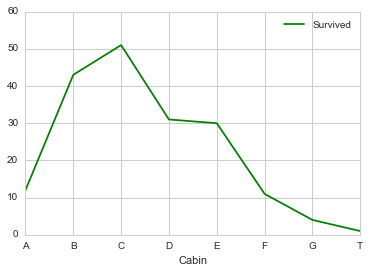

In [27]:
tita_df_clean_cabin.groupby(['Cabin'])[['Survived']].count().plot(kind='line', color='g')
plt.show()

## include title on your graph
## label your y axis

This is my analysis of...... I found......

In [28]:
tita_df_clean_cabin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B,C


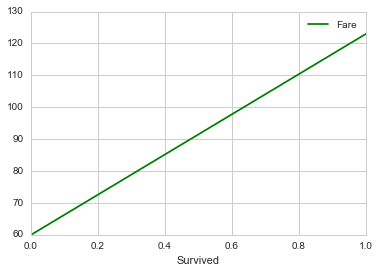

In [29]:
tita_df_clean_cabin.groupby(['Survived'])[['Fare']].count().plot(kind='line', color='g')
plt.show()

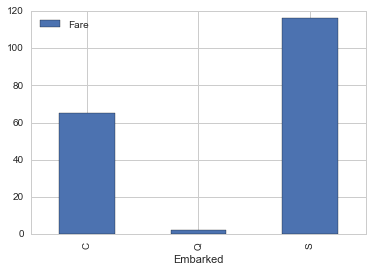

In [30]:
tita_df_clean_cabin.groupby(['Embarked'])[['Fare']].count().plot(kind = 'bar')

In [31]:

y= tita_df_1['Fare']
Fare_in=y.astype('int')

In [32]:
tita_df_1.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S


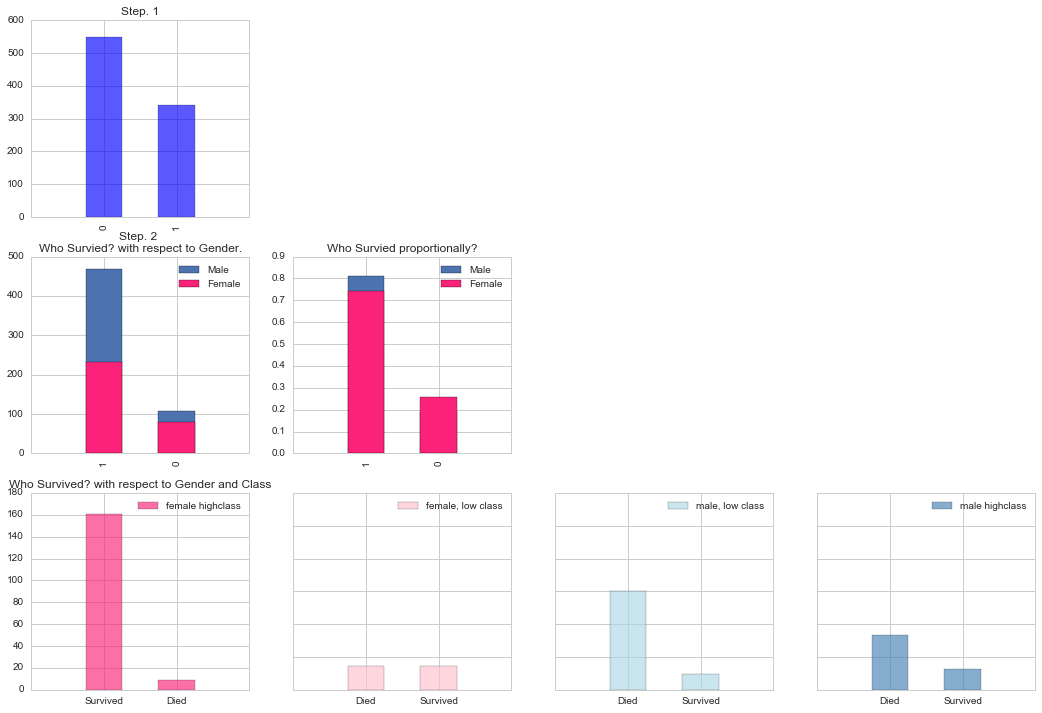

In [33]:
fig = plt.figure(figsize=(18,12))
a = 0.65
# Step 1
ax1 = fig.add_subplot(341)
tita_df_1.Survived.value_counts().plot(kind='bar', color="blue", alpha=a)
ax1.set_xlim(-1, len(tita_df_1.Survived.value_counts()))
plt.title("Step. 1")

# # Step 2
ax2 = fig.add_subplot(345)
tita_df_1.Survived[tita_df_1.Sex == 'male'].value_counts().plot(kind='bar',label='Male')
tita_df_1.Survived[tita_df_1.Sex == 'female'].value_counts().plot(kind='bar', color='#FA2379',label='Female')
ax2.set_xlim(-1, 2)
plt.title("Step. 2 \nWho Survied? with respect to Gender."); plt.legend(loc='best')

ax3 = fig.add_subplot(346)
(tita_df_1.Survived[tita_df_1.Sex == 'male'].value_counts()/float(tita_df_1.Sex[tita_df_1.Sex == 'male'].size)).plot(kind='bar',label='Male')
(tita_df_1.Survived[tita_df_1.Sex == 'female'].value_counts()/float(tita_df_1.Sex[tita_df_1.Sex == 'female'].size)).plot(kind='bar', color='#FA2379',label='Female')
ax3.set_xlim(-1,2)
plt.title("Who Survied proportionally?"); plt.legend(loc='best')


# # Step 3
ax4 = fig.add_subplot(349)
female_highclass = tita_df_1.Survived[tita_df_1.Sex == 'female'][tita_df_1.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female highclass', color='#FA2479', alpha=a)
ax4.set_xticklabels(["Survived", "Died"], rotation=0)
ax4.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax5 = fig.add_subplot(3,4,10, sharey=ax1)
female_lowclass = tita_df_1.Survived[tita_df_1.Sex == 'female'][tita_df_1.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=a)
ax5.set_xticklabels(["Died","Survived"], rotation=0)
ax5.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax6 = fig.add_subplot(3,4,11, sharey=ax1)
male_lowclass = tita_df_1.Survived[tita_df_1.Sex == 'male'][tita_df_1.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=a)
ax6.set_xticklabels(["Died","Survived"], rotation=0)
ax6.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax7 = fig.add_subplot(3,4,12, sharey=ax1)
male_highclass = tita_df_1.Survived[tita_df_1.Sex == 'male'][tita_df_1.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male highclass', alpha=a, color='steelblue')
ax7.set_xticklabels(["Died","Survived"], rotation=0)
ax7.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

plt.show()

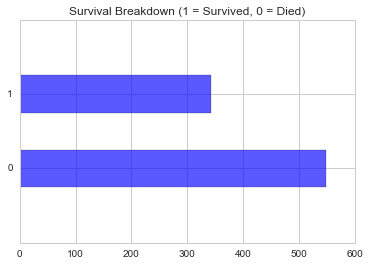

In [34]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
tita_df_1.Survived.value_counts().plot(kind='barh', color="blue", alpha=.65)
ax.set_ylim(-1, len(tita_df_1.Survived.value_counts())) 
plt.title("Survival Breakdown (1 = Survived, 0 = Died)")

(-1, 2)

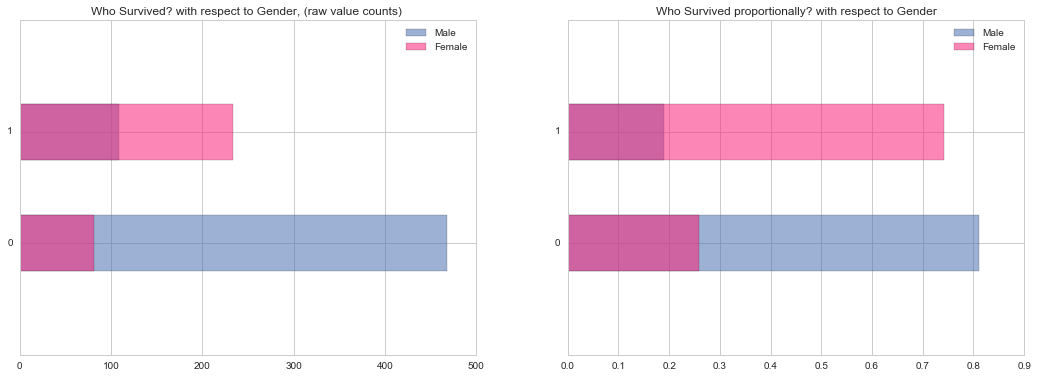

In [35]:
fig = plt.figure(figsize=(18,6))

#create a plot of two subsets, male and female, of the survived variable.
#After we do that we call value_counts() so it can be easily plotted as a bar graph. 
#'barh' is just a horizontal bar graph
df_male = tita_df_1.Survived[tita_df_1.Sex == 'male'].value_counts().sort_index()
df_female = tita_df_1.Survived[tita_df_1.Sex == 'female'].value_counts().sort_index()

ax1 = fig.add_subplot(121)
df_male.plot(kind='barh',label='Male', alpha=0.55)
df_female.plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived? with respect to Gender, (raw value counts) "); plt.legend(loc='best')
ax1.set_ylim(-1, 2)

ax2 = fig.add_subplot(122)
(df_male/float(df_male.sum())).plot(kind='barh',label='Male', alpha=0.55)  
(df_female/float(df_female.sum())).plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived proportionally? with respect to Gender"); plt.legend(loc='best')

ax2.set_ylim(-1, 2)

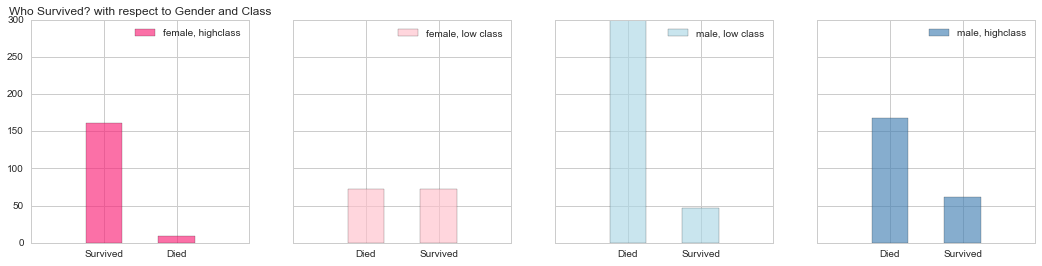

In [36]:
fig = plt.figure(figsize=(18,4), dpi=1600)
alpha_level = 0.65

ax1=fig.add_subplot(141)
female_highclass = tita_df_1.Survived[tita_df_1.Sex == 'female'][tita_df_1.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female, highclass', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')


ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass = tita_df_1.Survived[tita_df_1.Sex == 'female'][tita_df_1.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Died","Survived"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = tita_df_1.Survived[tita_df_1.Sex == 'male'][tita_df_1.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = tita_df_1.Survived[tita_df_1.Sex == 'male'][tita_df_1.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male, highclass', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

In [37]:
train_df = pd.read_csv("/Users/aishwaryachinnari/Desktop/myproj/D/T/Titanic/test-2.csv")
train_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [38]:
test_df = pd.read_csv('/Users/aishwaryachinnari/Desktop/myproj/D/T/Titanic/test-2.csv')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [39]:
test_df.shape

(418, 11)

In [40]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import svm
columns = "PassengerId Survived Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked".split()
from sklearn.model_selection import KFold
kf = KFold(n_splits=2)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

NameError: name 'X' is not defined

In [ ]:
train_df.describe()

In [ ]:
train_df.head()

In [ ]:
df = pd.read_csv("/Users/aishwaryachinnari/Desktop/myproj/D/T/Titanic/train-3.csv")
df.head(4)

In [ ]:
df.index

In [ ]:
df.columns

In [ ]:
df.columns.difference(test_df.columns)

In [ ]:
df.columns.equals(test_df.columns)

In [ ]:
df.ix[[5,10,15]]

In [ ]:
df[["Pclass","Fare"]]

In [ ]:
type(df[["Pclass"]])

In [ ]:
type(df["Pclass"])

In [ ]:
df.ix[[5,10,15], ["Pclass","Fare"]]

In [ ]:
df.groupby("Survived").Sex.describe()
### Understand this 

In [ ]:
df.groupby("Sex")[['Survived']].count()

In [ ]:
grouper=df.groupby("Pclass")

In [ ]:
grouper

In [ ]:

Pclass_map =grouper.Pclass.unique()
Pclass_map.sort()
with pd.option_context("max_rows",20):
    print(Pclass_map)



In [ ]:
grouper.Pclass.apply(lambda x: x .unique()[0])
Pclass_map.sort()

with pd.option_context("max_rows",20):
    print(Pclass_map)

In [ ]:
ax = df.groupby("Pclass").size().plot(kind="barh", figsize =(8,8))

In [ ]:
import seaborn as sns

In [ ]:
g = sns.factorplot("Fare","Age",
                  hue ="Survived",col ="Sex",data=df)

## increase the size of t

In [ ]:
# del df["Name"]
# del df["PassengerId"]
# del test_df["Ticket"]

In [ ]:
df.Pclass < 2

In [ ]:
df.ix[df.Pclass <=2 ,"Pclass"]

In [ ]:
df.ix[df.Pclass <=2,"Pclass" ].iloc[0]

In [ ]:
df.ix[df.Pclass <=2,"Pclass" ].loc[3]

In [ ]:
df.groupby("Pclass").Fare.mean()

In [ ]:
df.groupby("Survived").Age.mean().ix[0,1]

In [ ]:
df.filter(regex = "capital")

In [ ]:
cat = pd.Categorical(df.Survived)
cat.describe()

In [ ]:
cat

In [ ]:
cat.categories

In [ ]:
cat.codes

In [ ]:
df.Sex.str.contains("\?")

In [ ]:
df.ix[df.Sex.str.contains("\?"),"Sex"]

In [ ]:
df.Sex.unique()

In [ ]:
for col in df:
    if not df[col].dtype.kind == "o":
        continue
    
    if df[col].str.contains("\?").any():
        df.ix[df[col].str.contains("\?"),col] ="other"
        test.ix[test[col].str.contains("\?"),col] ="other"

In [ ]:
df.Sex.unique()

In [ ]:
formula = 'Survived ~ C(PassengerId) + C(Sex) + C(Pclass) +Age +C(SibSp) +C(Parch) +C(Ticket) +Fare+ C(Cabin)+C(Embarked)'

In [ ]:
Y, X = patsy.dmatrices(formula, data=df,return_type='dataframe')

In [ ]:
x_train, x_test, y_train, y_test = cross_validation.train_test_split(X,Y,test_size=.3)

In [ ]:

print x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

confusion = pd.DataFrame(confmat, index=['Died','Survived'],
                         columns=['Predicteddied','Predictedsurvived'])

print(confusion)

In [ ]:
y_pred

In [ ]:
TP = confusion.ix['Died','Predicteddied'] 

FP = confusion.ix['Died','Predictedsurvived']

TN = confusion.ix['Survived','Predicteddied']

FN = confusion.ix['Survived','Predictedsurvived']

print(zip(['True Positives','False Positives','True Negatives','False Negatives'],
          [TP, FP, TN, FN]))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import StratifiedShuffleSplit

In [ ]:
## Filling the missingvalues with the average age
df["Age"] = df["Age"].fillna(df["Age"].mean())
df.Age.isnull().sum()

In [ ]:
X= df[['Pclass','SibSp','Parch','Age', 'Fare']]
X.head()

In [ ]:
X.info()

In [ ]:
y = df.Survived

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.4)

In [ ]:
grid = {
    'C': np.power(10.0, np.arange(0, 10))
}
gs = GridSearchCV(model, grid , scoring='roc_auc', cv=5)
gs.fit(X, y)

In [ ]:
print('gs.best_score_:', gs.best_score_)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

from ipywidgets import *
from IPython.display import display
from sklearn.cross_validation import cross_val_score

In [ ]:
dtc = DecisionTreeClassifier(max_depth=2) ## change this to 2,3,4, none
dtc.fit(Xtrain, ytrain)


In [ ]:
dtc_params = {"max_depth" : [2,3,5,7]}
GridSearchCV(dtc, dtc_params)

In [ ]:
dtc.predict(Xtest)

In [ ]:
dtc_scores = cross_val_score(dtc, Xtrain, ytrain, cv=3)
print dtc_scores, np.mean(dtc_scores)

In [ ]:

# Use graphviz to make a chart of the regression tree decision points:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [ ]:
# TEMPLATE CODE

# initialize the output file object
dot_data = StringIO()

# my fit DecisionTreeRegressor object here is: dtr1
# for feature_names i put the columns of my Xr matrix
export_graphviz(dtc, out_file=dot_data,  
               filled=True, rounded=True,
               special_characters=True,
               feature_names=Xtrain.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
## Use gridsearch



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 5)

In [ ]:
rfc.fit(Xtrain, ytrain)

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
clf = linear_model.Lasso(alpha =0.1,max_iter =1000,copy_X=True)

In [ ]:
clf.fit(Xtrain,ytrain)